# DMML exam: 2023-02-10

This dataset is composed of a range of biomedical voice measurements from people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain 

- **target** variable
    - total_UPDRS - Clinician's total UPDRS score, linearly interpolated
- **voice** variables
    - Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
    - Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude
    - NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    - RPDE - A nonlinear dynamical complexity measure
    - DFA - Signal fractal scaling exponent
    - PPE - A nonlinear measure of fundamental frequency variation 


# Instructions summary
1. Import the *parkinson_voice.csv* dataset
2. Perform an **exploratory analysis**
    - Report and discuss the results of the analysis
3. Formulate the binary classification problem
    - Define a new column (name it **UPDRS_Severity**) as *binarization* of the **total_UPDRS** variable. The aim of the operation is to define two classes for the severity of the disease: if the value of **total_UPDRS** is higher than a cut-off value, the class is "1" or "True" (representing a *severe* level of the disease), otherwise the class is "0" or "False" (representing a *moderate* level of the disease). Use the 75h percentile (i.e., 3rd quartile) of the distribution of **total_UPDRS** as cut-off value. 
    
4. Carry out a **classification analysis** aimed at predicting the **UPDRS_Severity** class **based only on the voice variables**, considering the following setting:
    - Apply a 10-fold cross-validation procedure on the dataset (with shuffling) to identify the most suitable classifier among the following:
        - DecisionTree classifier (default params)
        - DecisionTree classifier (default params) after oversampling with SMOTE
        - KNearestNeighbor classifier (default params)
        - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 10 features
    - Report and discuss the results, motivating the choice of the most suitable model
    
# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the *parkinson.csv* dataset

In [1]:
# TODO
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df= pd.read_csv('parkinson_voice.csv')

# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [2]:
# TODO
df

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [3]:
df.shape

(5875, 17)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,5865,5866,5867,5868,5869,5870,5871,5872,5873,5874
total_UPDRS,34.398000,34.894000,35.389000,35.810000,36.375000,36.870000,37.363000,37.857000,38.353000,38.849000,...,36.029000,35.401000,34.979000,34.482000,33.908000,33.485000,32.988000,32.495000,32.007000,31.513000
Jitter(%),0.006620,0.003000,0.004810,0.005280,0.003350,0.003530,0.004220,0.004760,0.004320,0.004960,...,0.003290,0.004480,0.002500,0.002490,0.002740,0.004060,0.002970,0.003490,0.002810,0.002820
Jitter(Abs),0.000034,0.000017,0.000025,0.000027,0.000020,0.000023,0.000024,0.000025,0.000029,0.000027,...,0.000024,0.000036,0.000019,0.000021,0.000021,0.000031,0.000025,0.000025,0.000020,0.000021
Jitter:RAP,0.004010,0.001320,0.002050,0.001910,0.000930,0.001190,0.002120,0.002260,0.001560,0.002580,...,0.001440,0.002080,0.001160,0.000660,0.001180,0.001670,0.001190,0.001520,0.001280,0.001350
Jitter:PPQ5,0.003170,0.001500,0.002080,0.002640,0.001300,0.001590,0.002210,0.002590,0.002070,0.002530,...,0.001320,0.002260,0.001360,0.001040,0.001380,0.001680,0.001470,0.001870,0.001510,0.001660
Jitter:DDP,0.012040,0.003950,0.006160,0.005730,0.002780,0.003570,0.006370,0.006780,0.004680,0.007730,...,0.004320,0.006250,0.003470,0.001980,0.003550,0.005000,0.003580,0.004560,0.003830,0.004060
Shimmer,0.025650,0.020240,0.016750,0.023090,0.017030,0.022270,0.043520,0.021910,0.042960,0.036100,...,0.020450,0.023860,0.022170,0.016130,0.025260,0.018960,0.023150,0.024990,0.014840,0.019070
Shimmer(dB),0.230000,0.179000,0.181000,0.327000,0.176000,0.214000,0.445000,0.212000,0.371000,0.310000,...,0.180000,0.213000,0.193000,0.142000,0.218000,0.160000,0.215000,0.244000,0.131000,0.171000
Shimmer:APQ3,0.014380,0.009940,0.007340,0.011060,0.006790,0.010060,0.023760,0.009790,0.017740,0.020300,...,0.010200,0.011210,0.011040,0.004690,0.013750,0.009730,0.010520,0.013710,0.006930,0.009460
Shimmer:APQ5,0.013090,0.010720,0.008440,0.012650,0.009290,0.013370,0.026210,0.014620,0.021340,0.019700,...,0.012870,0.014750,0.013160,0.007730,0.015950,0.011330,0.012770,0.014560,0.008700,0.011540


In [5]:
df.head(5)

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
df.tail(5)

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,31.513,0.00282,0.000021,0.00135,0.00166,0.00406,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [7]:
df.describe()

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


from the statistical analysis we can see that all attributes (except for the target variable total_UPDRS and for a noise measure- HNR) present values going from 0 to 1, so we only have floating objects in our dataset. 

In [8]:
df.isna().any()

total_UPDRS      False
Jitter(%)        False
Jitter(Abs)      False
Jitter:RAP       False
Jitter:PPQ5      False
Jitter:DDP       False
Shimmer          False
Shimmer(dB)      False
Shimmer:APQ3     False
Shimmer:APQ5     False
Shimmer:APQ11    False
Shimmer:DDA      False
NHR              False
HNR              False
RPDE             False
DFA              False
PPE              False
dtype: bool

In [9]:
df.isna().sum(axis=0)

total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

The dataset does not contain missing values

<Axes: title={'center': 'relationship between jitter and shimmer'}, xlabel='Jitter(%)', ylabel='Shimmer'>

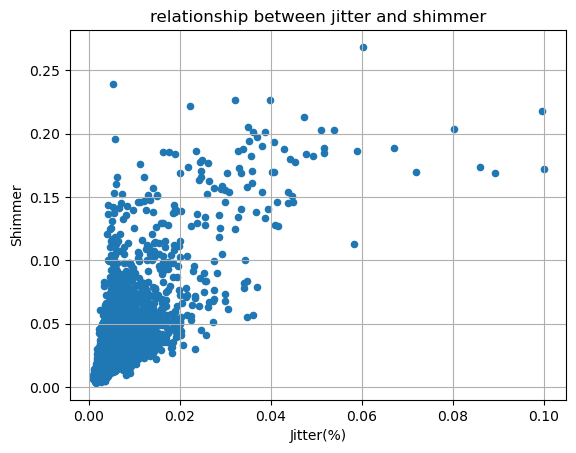

In [10]:
df.plot(kind='scatter', x='Jitter(%)', y='Shimmer',
       title='relationship between jitter and shimmer',
       grid=True)

In [11]:
from scipy.stats import pearsonr

pearsonr(df['Jitter(%)'], df['Shimmer'])

PearsonRResult(statistic=0.7097911159473325, pvalue=0.0)

In [12]:
df.corr()

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
total_UPDRS,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660
Shimmer,0.092141,0.709791,0.649046,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709
Shimmer(dB),0.098790,0.716704,0.655871,0.685551,0.734591,0.685556,0.992334,1.000000,0.968015,0.976373,0.936338,0.968014,0.798077,-0.802496,0.472409,0.126111,0.635163
Shimmer:APQ3,0.079363,0.664149,0.623830,0.650226,0.676711,0.650228,0.979828,0.968015,1.000000,0.962723,0.885695,1.000000,0.732736,-0.780697,0.436878,0.130735,0.576704
Shimmer:APQ5,0.083467,0.694002,0.621401,0.659831,0.734021,0.659833,0.984904,0.976373,0.962723,1.000000,0.938935,0.962723,0.798173,-0.790638,0.450890,0.128038,0.593677


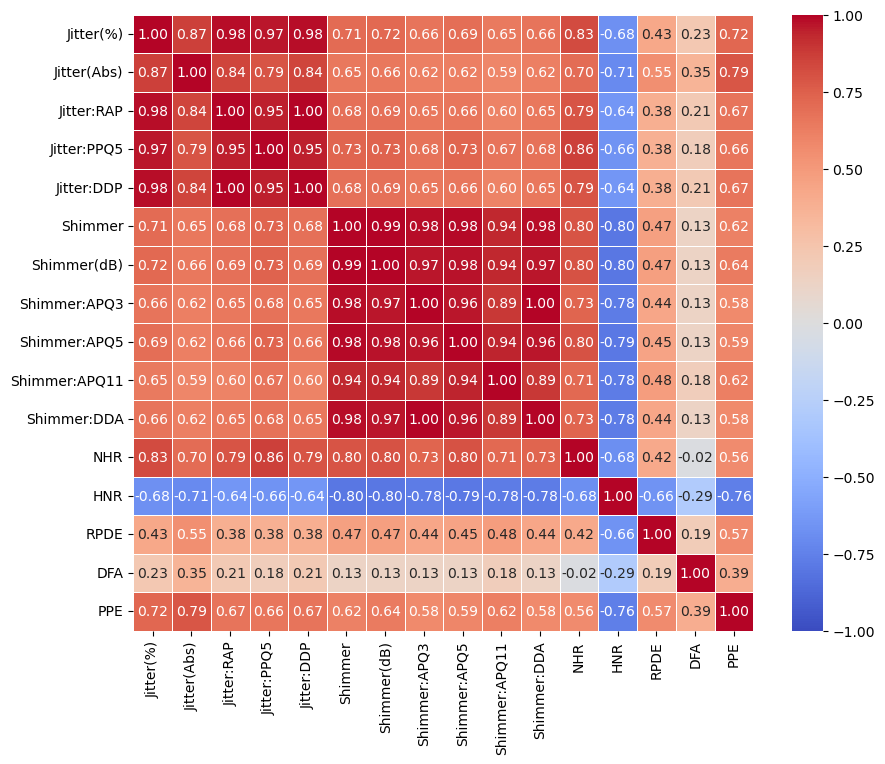

In [13]:
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.drop(['total_UPDRS'], axis=1).corr(),
           annot=True,
           linewidths=.5,
           fmt='.2f',
           ax=ax,
           vmin=-1,            #min value
           vmax=1,             #max value
           cmap='coolwarm')
plt.show()

Obviously we can see a positive correlation (pearson close to 1) between all the measures of jitter and themselves and same for all the measures of shimmer. Also, the relationship between jitter and shimmer measures is, in total, positively correlated, indicating a dependency between frequency and amplitude of the voice tone.

we can also see that one of the 2 noise measures (NHR) is positively correlated with the rest of the attributes, while the second one (HNR) is negatively correlated with all the other attributes. 

to conclude, we see that our target variable, total_UPDRS is independent and incorrelated from the other variables.

As we already saw from the statistical analysis, only Total_UPDRS and HNR are exception, demonstrating little correlation with all the other variables.

<Axes: ylabel='Frequency'>

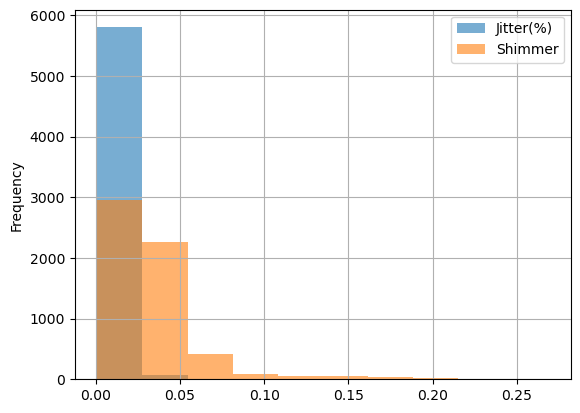

In [14]:
df[['Jitter(%)', 'Shimmer']].plot(kind='hist',
                                 grid=True,
                                 alpha=0.6)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

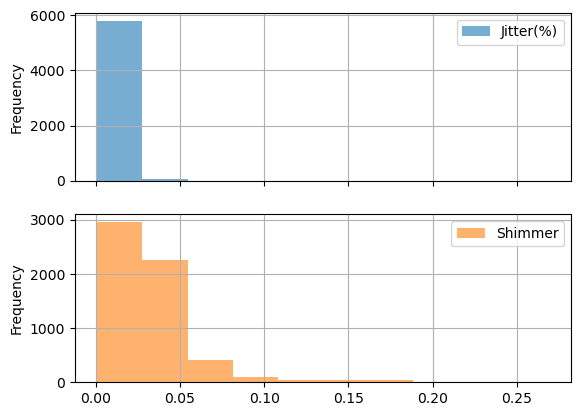

In [15]:
df[['Jitter(%)', 'Shimmer']].plot(kind='hist',
                                 grid=True,
                                 alpha=0.6,
                                 subplots=True)

C:\Users\chiar\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='total_UPDRS', ylabel='HNR'>

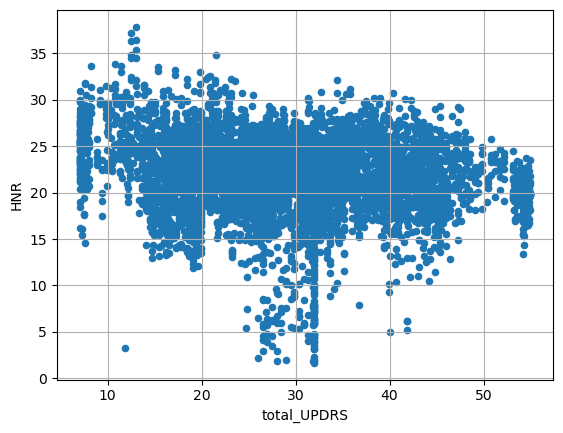

In [16]:
df.plot(kind='scatter', x='total_UPDRS', y='HNR',
       grid=True, colormap='Blues', colorbar=False)

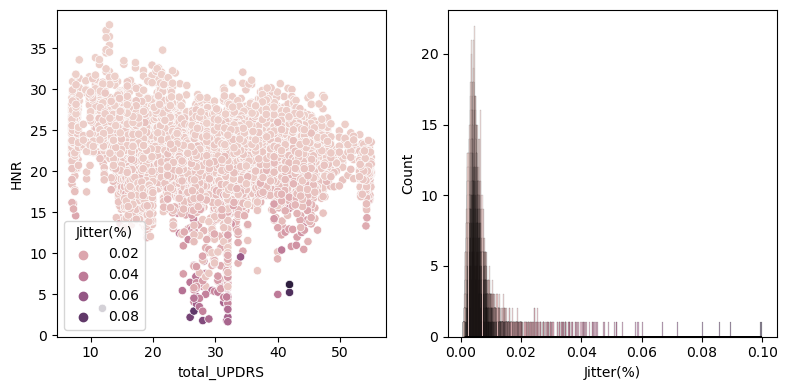

In [17]:
f, axes= plt.subplots(1,2, figsize=(8,4))

sns.scatterplot(data=df,
               x='total_UPDRS',
               y='HNR',
               hue='Jitter(%)',
               ax=axes[0])   

sns.histplot(data=df,
            x='Jitter(%)',
            hue='Jitter(%)',
            legend=False,
            ax=axes[1])     
#adjust layout to prevent overlapping
f.tight_layout()

# 3. Formulate the binary classification problem
- Define a new column (name it **UPDRS_Severity**) as *binarization* of the **total_UPDRS** variable. The aim of the operation is to define two classes for the severity of the disease: if the value of **total_UPDRS** is higher than a cut-off value, the class is "1" or "True" (representing a *severe* level of the disease), otherwise the class is "0" or "False" (representing a *moderate* level of the disease). Use the 75h percentile (i.e., 3rd quartile) of the distribution of **total_UPDRS** as cut-off value. 
    

In [18]:
# TODO
cut_off= df['total_UPDRS'].quantile(0.75)
new_column= lambda x: 1 if x > cut_off else 0
df['UPDRS_Severity']= df['total_UPDRS'].apply(new_column)
df

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS_Severity
0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0
5871,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0
5872,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0
5873,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0


# 4. Carry out a **classification analysis** aimed at predicting the **UPDRS_Severity** class **based only on the voice variables**, considering the following setting
- Apply a 10-fold cross-validation procedure on the dataset (with shuffling) to identify the most suitable classifier among the following:
    - DecisionTree classifier (default params)
    - DecisionTree classifier (default params) after oversampling with SMOTE
    - KNearestNeighbor classifier (default params)
    - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 10 features
- Report and discuss the results, motivating the choice of the most suitable model
    

In [19]:
# TODO
df.drop(['total_UPDRS'], axis=1, inplace=True)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

estimators1= [('scaling', StandardScaler()),
            ('clf', KNeighborsClassifier(n_neighbors=5))]
pipe1=Pipeline(estimators1)
pipe1

Pipeline(steps=[('scaling', StandardScaler()), ('clf', KNeighborsClassifier())])

In [21]:
estimators2= [('scaling', StandardScaler()),
              ('feature-selection', SelectKBest(k=10)),
              ('clf', KNeighborsClassifier(n_neighbors=5))]
pipe_k_best=Pipeline(estimators2)
pipe_k_best

Pipeline(steps=[('scaling', StandardScaler()),
                ('feature-selection', SelectKBest()),
                ('clf', KNeighborsClassifier())])

In [22]:
def model(pipe):
    from sklearn.metrics import accuracy_score, f1_score, make_scorer
    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    pipe.fit(X_train, y_train)
    y_pred= pipe.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    

In [23]:
model(pipe1)
model(pipe_k_best)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf= StratifiedKFold(10, shuffle=True, random_state=21)
results_pipe1= cross_validate(pipe1,
                        X,
                        y,
                        scoring= {'fscore': make_scorer(f1_score),
                                'accuracy': make_scorer(accuracy_score)},
                        return_estimator=True,
                        cv=skf,
                        n_jobs=-1)
print(results_pipe1)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf= StratifiedKFold(10, shuffle=True, random_state=21)
results_pipe_k_best= cross_validate(pipe_k_best,
                        X,
                        y,
                        scoring= {'fscore': make_scorer(f1_score),
                                'accuracy': make_scorer(accuracy_score)},
                        return_estimator=True,
                        cv=skf,
                        n_jobs=-1)
print(results_pipe_k_best)

In [ ]:
results_pipe1['test_fscore']

In [ ]:
results_pipe_k_best['test_fscore']

In [ ]:
metrics= pd.DataFrame({'nofsel':results_pipe1['test_fscore'], 
                      'fsel':results_pipe_k_best['test_fscore']})
metrics

In [ ]:
from matplotlib import pyplot as plt
ax= metrics.boxplot(figsize=(3,3))
ax.set_ylabel('f-score')
plt.show()

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(metrics.fsel, metrics.nofsel)

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
